### ref
- [pandas read all csv files in folder](https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)
- [dictionary add python](https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary)
- [subplot xlabel](https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)

- [subplots 간격, subplots hspace](https://stackoverflow.com/questions/2418125/matplotlib-subplots-adjust-hspace-so-titles-and-xlabels-dont-overlap?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)
- [tight_layout](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.tight_layout)

In [1]:
from os import path
import glob

import pandas as pd

## read files

In [2]:
path= 'data_join\\totalByArea\\'
filePaths= glob.glob(path+'*.csv')

In [3]:
filePaths= [x.replace('\\','/') for x in filePaths]; filePaths

['data_join/totalByArea/광진구.csv',
 'data_join/totalByArea/동대문구.csv',
 'data_join/totalByArea/마포구.csv',
 'data_join/totalByArea/서대문구.csv',
 'data_join/totalByArea/성동구.csv',
 'data_join/totalByArea/양천구.csv',
 'data_join/totalByArea/영등포구.csv',
 'data_join/totalByArea/용산구.csv',
 'data_join/totalByArea/은평구.csv',
 'data_join/totalByArea/종로구.csv',
 'data_join/totalByArea/중구.csv']

In [4]:
areaNames= [x.split('/')[-1].split('.')[0] for x in filePaths]; areaNames

['광진구', '동대문구', '마포구', '서대문구', '성동구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구']

In [29]:
dictBikes= dict({})
for areaName, filePath in zip(areaNames, filePaths):
    dictBikes[areaName]= pd.read_csv(filePath, index_col=None, encoding= 'cp949', engine= 'python', parse_dates=['날짜'])
    dictBikes[areaName]= dictBikes[areaName].drop(['weekday'], axis= 1)

In [30]:
bikeDkeys= list(dictBikes.keys()); bikeDkeys

['광진구', '동대문구', '마포구', '서대문구', '성동구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구']

In [31]:
print(dictBikes[bikeDkeys[0]].shape)
print(list(dictBikes[bikeDkeys[0]].columns))
print(type(dictBikes[bikeDkeys[0]].날짜[0]))
dictBikes[bikeDkeys[0]].head(2)

(730, 25)
['날짜', 'area', 'rentcnt', '인구', '아파트가격', '평균풍속', '최대풍속', '순간최고풍속', '기온평균', '강수일강수', '습도평균', '미세먼지', '초미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek', 'weekend']
<class 'pandas._libs.tslib.Timestamp'>


,날짜,area,rentcnt,인구,아파트가격,평균풍속,최대풍속,순간최고풍속,기온평균,강수일강수,...,일산화탄소,아황산가스,year,month,day,hour,minute,second,dayofweek,weekend
0,2016-01-01,4,40,248415,94.6,0.8,4.0,5.5,2.9,0.0,...,1.0,0.005,2016,1,1,0,0,0,4,0.0
1,2016-01-02,4,25,248415,94.6,1.2,6.1,7.2,6.9,0.0,...,0.7,0.005,2016,1,2,0,0,0,5,1.0


## visualization

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
bikeDkeys

['광진구', '동대문구', '마포구', '서대문구', '성동구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구']

In [34]:
dictBikes['광진구'].loc[0:0,'area':'아황산가스']

,area,rentcnt,인구,아파트가격,평균풍속,최대풍속,순간최고풍속,기온평균,강수일강수,습도평균,미세먼지,초미세먼지,오존,이산화질소,일산화탄소,아황산가스
0,4,40,248415,94.6,0.8,4.0,5.5,2.9,0.0,75.9,77.0,39.0,0.004,0.047,1.0,0.005


In [35]:
areaLen= len(areaNames)
print(areaNames)
areaLen

['광진구', '동대문구', '마포구', '서대문구', '성동구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구']


11

In [36]:
cols= list(dictBikes[bikeDkeys[0]].columns)
colsLen= len(cols)
print(colsLen)
print(cols)
print(cols[3:])

25
['날짜', 'area', 'rentcnt', '인구', '아파트가격', '평균풍속', '최대풍속', '순간최고풍속', '기온평균', '강수일강수', '습도평균', '미세먼지', '초미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek', 'weekend']
['인구', '아파트가격', '평균풍속', '최대풍속', '순간최고풍속', '기온평균', '강수일강수', '습도평균', '미세먼지', '초미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek', 'weekend']


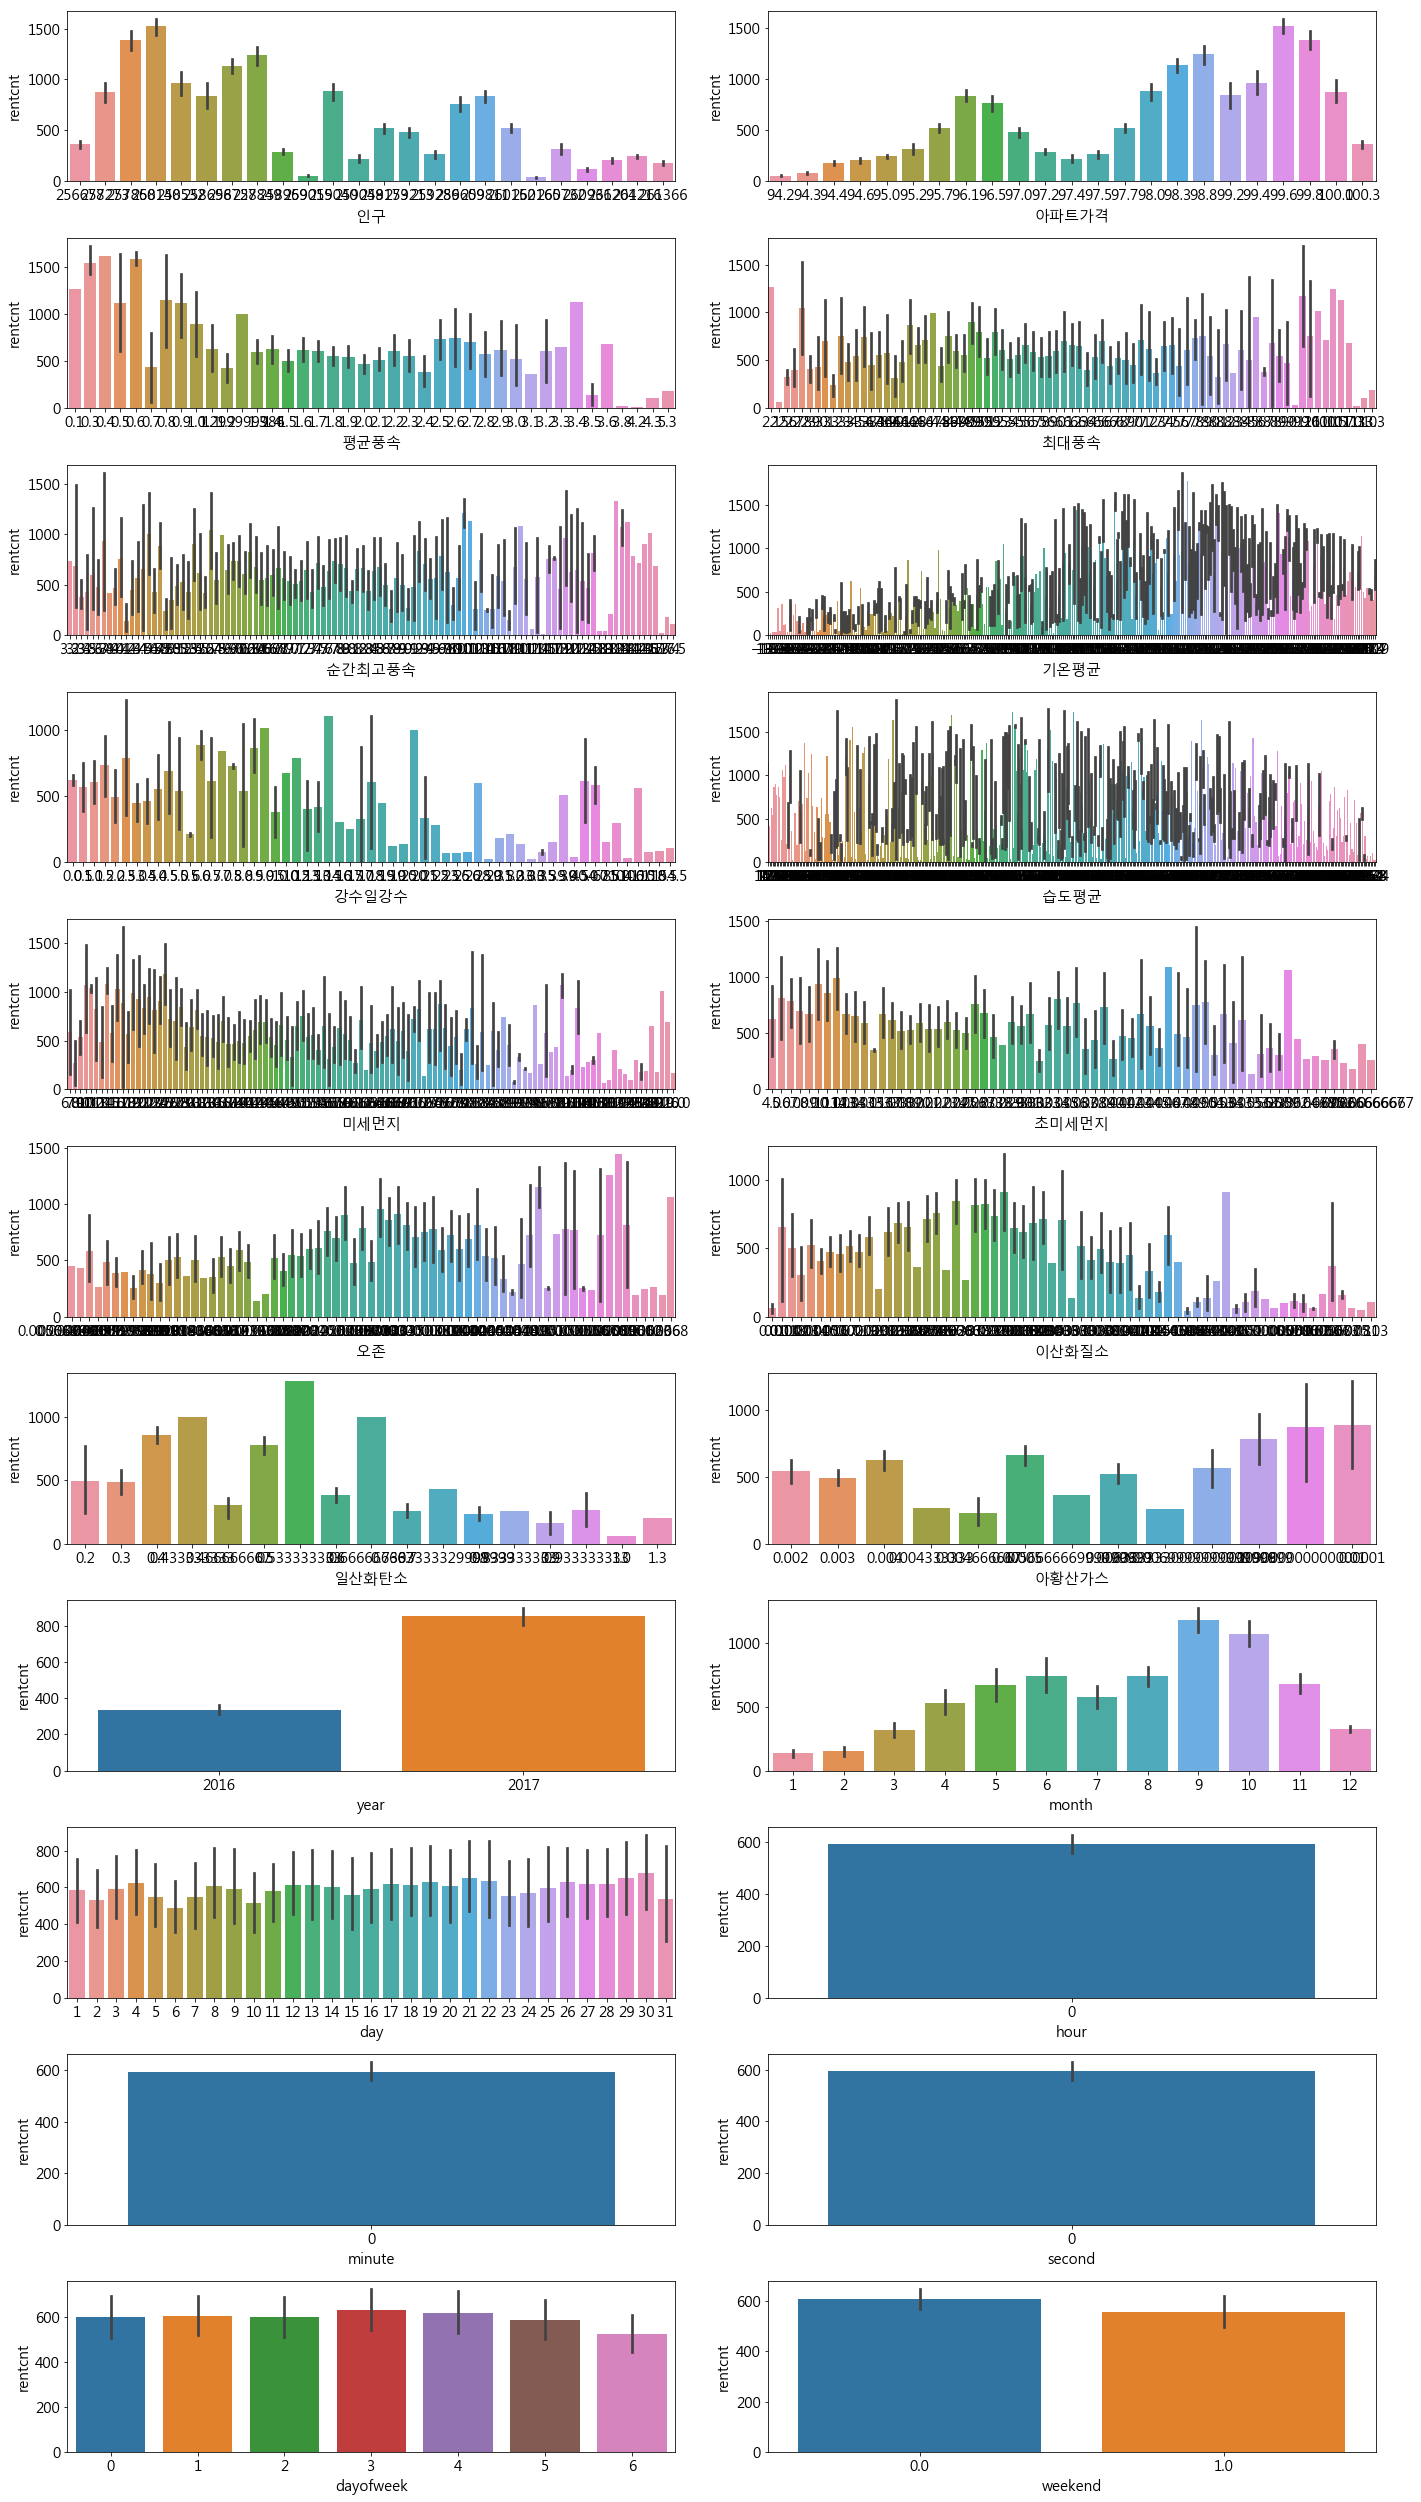

In [71]:
font= {'family': 'Malgun Gothic',
      'size': 15}
plt.rc('font', **font)
# plt.subplots_adjust(hspace=0.8)


#['광진구', '동대문구', '마포구', '서대문구', '성동구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구']
for area in areaNames:
    fig.clear()
    fig, axis= plt.subplots(int(colsLen/2)-1,2) # int(colsLen/2)+1
    fig.set_size_inches(20,35)
    for i in range(colsLen-3):
        sns.barplot(data= dictBikes[area], x= cols[3:][i], y='rentcnt',
                    ax= axis[int(i/2)][i%2])
        #axis[int(i/2)][i%2].set_title(cols[3:][i])

    fig.tight_layout(pad=1.08, h_pad=0.6)
    fig.savefig('img/'+area+'.png', dpi= 300)